In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math
import cv2
import skimage
import glob
from PIL import Image

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from scipy.spatial import ConvexHull
from skimage import feature


In [2]:
IMAGES_PATH = os.path.join(os.getcwd(), 'data\\ISIC-example-images\\')

#Load
def csv_to_array(path, type):
    return np.genfromtxt (path, delimiter=",", dtype=type, names=True)

def orderData(labels, data):
    ordered_labels = [x for _,x in sorted(zip(data, labels), reverse=True)]
    ordered_values = sorted(data, reverse=True)
    
    return ordered_labels, ordered_values


In [3]:
#Load Images
path = 'C:\\Users\\el295904\\Dataset\\ISIC_2018\\'

IMAGES_PATH = os.path.join(os.getcwd(), 'data\\seg-example-images\\')

load_path_ground = os.path.join(path, 'Original\\Training_Segmentation\\*.png')
files = glob.glob(load_path_ground)

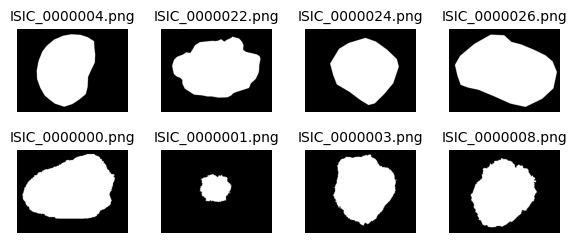

In [4]:
approx_path = os.path.join(IMAGES_PATH, 'approx\\')
expert_path = os.path.join(IMAGES_PATH, 'expert\\')

approx_img = os.listdir(approx_path)
expert_img = os.listdir(expert_path)

img_arr = []
names = []

def load_image(img, path):
    img = Image.open(path+img).convert('RGB')
    return img

def image_names(list, path):
    for image in list:
        img_arr.append(load_image(image, path))
        names.append(image)

image_names(approx_img, approx_path)
image_names(expert_img, expert_path)

fig, axarr = plt.subplots(2,4, figsize = (7, 3))

fig.subplots_adjust(hspace = 0.1, wspace = 0.3)

ax = axarr.ravel()

for i in range(0, len(img_arr)):
    ax[i].axis('off')
    ax[i].imshow(img_arr[i])
    ax[i].set_title(names[i], fontsize = 10)


In [18]:
def number_boxes(border, size):

    number = np.add.reduceat(
            np.add.reduceat(border, np.arange(0, border.shape[0], size), axis=0), 
                                    np.arange(0, border.shape[1], size), axis=1)

    return len(np.where((number > 0) & (number < size*size))[0])


def fractal_box(border, threshold = 0.9):
    #Create binary image
    border = (border < threshold)

    #Minimal dimension
    minimum = min(border.shape)

    #Exponent
    n = 2**np.floor(np.log(minimum)/np.log(2))

    n = int(np.log(n)/np.log(2))

    sizes = 2**np.arange(n, 1, -1)
           #Find amount of generated boxes for caluclating the score        
    counts = []
    
    for size in sizes:
        counts.append(number_boxes(border, size))

    #Fit log sizes with log counts to calculate the total score
    #Higher the value means more fractal in nature (tight corners)
    coeff = np.polyfit(np.log(sizes), np.log(counts), 1)

    return -coeff[0]


images = []

for f in range(0, 50): #files:
    image = np.array(Image.open(files[f]))
    images.append(image)

for i in range(0, len(images)):
    edges = feature.canny(images[i], sigma=3)
    
    score = fractal_box(edges)
    
    print(files[i], score)
    



C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000000_segmentation.png 1.1652996448805002
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000001_segmentation.png 1.0714354243380375
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000003_segmentation.png 1.1437245563224696
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000004_segmentation.png 1.1259207849107613
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000006_segmentation.png 1.093127269029027
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000007_segmentation.png 1.0625449298996246
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000008_segmentation.png 1.1462264133632696
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0000009_segmentation.png 1.1179144508089418
C:\Users\el295904\Dataset\ISIC_2018\Original\Training_Segmentation\ISIC_0